<a href="https://colab.research.google.com/github/gopikasuresh6050/azure/blob/main/azure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to analyze azure cloud usage data along with external factors such as economic index,seasonal factors and holidays

In [ ]:
import pandas as pd
df=pd.read_excel("data.xlsx")
df.head()

,Timestamp,Region,Service,Usage_Units,Provisioned_Capacity,Cost_USD,Availability_%,Holiday
0,2023-01-01,eastus,Compute,401,500,200.50,99.90,1
1,2023-01-01,westeurope,Storage,8028,10000,80.28,99.95,1
2,2023-01-02,eastus,Compute,408,500,204.00,99.90,0
3,2023-01-02,westeurope,Storage,7984,10000,79.84,99.95,0
4,2023-01-03,eastus,Compute,411,500,205.50,99.90,0


the data set contains 540 records with 11 columns including usage,cost,region,service type,and external influencing factors

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             540 non-null    object 
 1   Region                540 non-null    object 
 2   Service               540 non-null    object 
 3   Usage_Units           540 non-null    int64  
 4   Provisioned_Capacity  540 non-null    int64  
 5   Cost_USD              540 non-null    float64
 6   Availability_%        540 non-null    float64
 7   Holiday               540 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 33.9+ KB


there are no missing values in the datase.
all columns have complete 540 entries
data types are appropriate for analysis

In [ ]:
df.describe()

,Usage_Units,Provisioned_Capacity,Cost_USD,Availability_%,Holiday
count,540.000000,540.000000,540.000000,540.000000,540.000000
mean,4446.746296,5775.000000,156.743704,99.916852,0.285185
std,3996.541343,5261.754665,73.523959,0.034287,0.451921
min,395.000000,500.000000,79.500000,99.850000,0.000000
25%,458.750000,550.000000,84.290000,99.900000,0.000000
50%,4235.500000,5300.000000,143.330000,99.910000,0.000000
75%,8429.000000,11000.000000,229.125000,99.950000,1.000000
max,8916.000000,12000.000000,260.500000,99.950000,1.000000


In [ ]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Year"]=df["Timestamp"].dt.year
df["Month"]=df["Timestamp"].dt.month
df["Utilization_%"]=(df["Usage_Units"]/
                     df["Provisioned_Capacity"])*100
df.head()

,Timestamp,Region,Service,Usage_Units,Provisioned_Capacity,Cost_USD,Availability_%,Holiday,Year,Month,Utilization_%
0,2023-01-01,eastus,Compute,401,500,200.50,99.90,1,2023,1,80.20
1,2023-01-01,westeurope,Storage,8028,10000,80.28,99.95,1,2023,1,80.28
2,2023-01-02,eastus,Compute,408,500,204.00,99.90,0,2023,1,81.60
3,2023-01-02,westeurope,Storage,7984,10000,79.84,99.95,0,2023,1,79.84
4,2023-01-03,eastus,Compute,411,500,205.50,99.90,0,2023,1,82.20


in this section ,we analyze usage trend,cost patters and relationships between variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
type(df)

pandas.core.frame.DataFrame

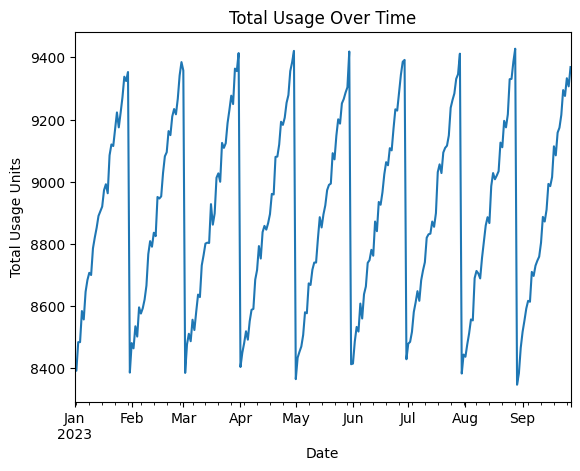

In [ ]:
Usage_Over_Time=df.groupby("Timestamp")["Usage_Units"].sum()
Usage_Over_Time.plot()
plt.title("Total Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Total Usage Units")
plt.show()

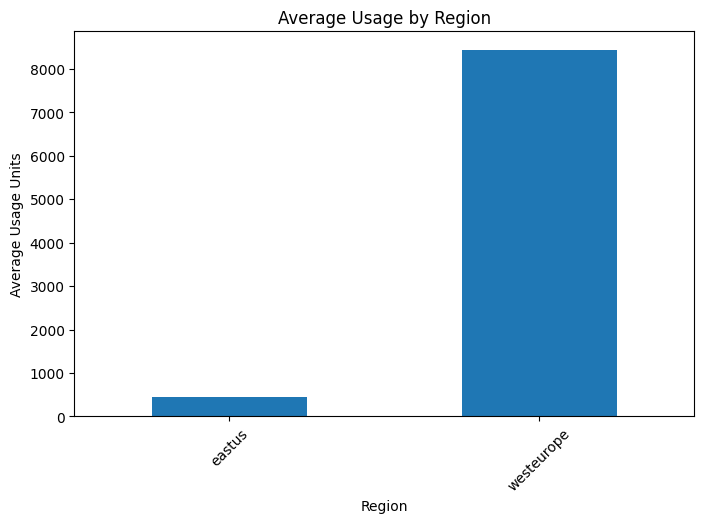

In [ ]:
avg_region_usage=df.groupby("Region")["Usage_Units"].mean()
plt.figure(figsize=(8,5))
avg_region_usage.plot(kind="bar")
plt.title("Average Usage by Region")
plt.xlabel("Region")
plt.ylabel("Average Usage Units")
plt.xticks(rotation=45)
plt.show()

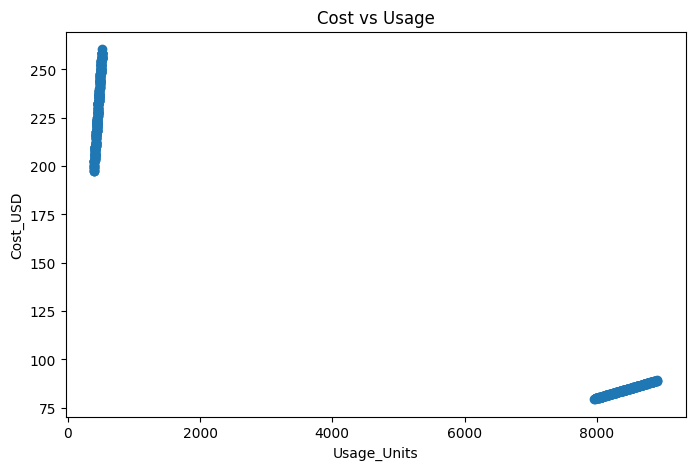

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df["Usage_Units"],df["Cost_USD"])
plt.title("Cost vs Usage")
plt.xlabel("Usage_Units")
plt.ylabel("Cost_USD")
plt.show()


In [ ]:
correlation=df["Usage_Units"].corr(df["Cost_USD"])
print("Correlation between Usage and Cost:",correlation)

Correlation between Usage and Cost: -0.9822313314742117


In [ ]:
print(df.columns)

Index(['Timestamp', 'Region', 'Service', 'Usage_Units', 'Provisioned_Capacity',
       'Cost_USD', 'Availability_%', 'Holiday', 'Year', 'Month',
       'Utilization_%'],
      dtype='object')


In [ ]:
df["Usage_Units"].corr(df["Cost_USD"])

np.float64(-0.9822313314742117)

a strong negative correlation(-0.98)was observwd between usage and cost.this indicates an inverse relationship in the dataset.the behaviour may result from cumulative usage patterns or structured data generation rather than real world billing dynamics